In [60]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/electron_selection_failSelection_compressed/'

In [93]:
resultsDir = "c:/Users/llave/Desktop/failSelection_p0/"
indices = np.load(resultsDir+"outputFiles/falseEventsE.npy",allow_pickle=True)
indices = np.reshape(indices,(int(indices.shape[0]/4),4))
print(indices.shape)
false_indices = np.array([x for x in indices if x[3]<=0.5])
true_indices = np.array([x for x in indices if x[3]>0.5])
print(true_indices.shape, false_indices.shape)

(6017, 4)
(5950, 4) (67, 4)


In [94]:
%matplotlib inline
etas, phis = [],[]
muonRecos, tauRecos = [],[]
for event in true_indices:
    fileNum = int(event[0])
    eventNum = int(event[1])
    label = event[2]
    pred = event[3]
            
    infos = np.load(dataDir+'e_0p25_{0}.npz'.format(str(fileNum)))['infos']
    for info in infos:
        if(int(info[1]) == eventNum):
            etas.append(info[7])
            phis.append(info[8])
            muonRecos.append(info[5])
            tauRecos.append(info[6])

(array([[0.00033613, 0.        , 0.        , ..., 0.        , 0.00016807,
         0.00033613],
        [0.00016807, 0.        , 0.00016807, ..., 0.        , 0.00016807,
         0.        ],
        [0.00016807, 0.        , 0.        , ..., 0.        , 0.00016807,
         0.0005042 ],
        ...,
        [0.00016807, 0.        , 0.        , ..., 0.        , 0.00016807,
         0.        ],
        [0.        , 0.0005042 , 0.00016807, ..., 0.        , 0.00033613,
         0.00016807],
        [0.        , 0.        , 0.00016807, ..., 0.        , 0.00016807,
         0.        ]]),
 array([-2.39903978e+00, -2.33049591e+00, -2.26195204e+00, -2.19340817e+00,
        -2.12486429e+00, -2.05632042e+00, -1.98777655e+00, -1.91923267e+00,
        -1.85068880e+00, -1.78214493e+00, -1.71360106e+00, -1.64505718e+00,
        -1.57651331e+00, -1.50796944e+00, -1.43942557e+00, -1.37088169e+00,
        -1.30233782e+00, -1.23379395e+00, -1.16525008e+00, -1.09670620e+00,
        -1.02816233e+00, -9.5

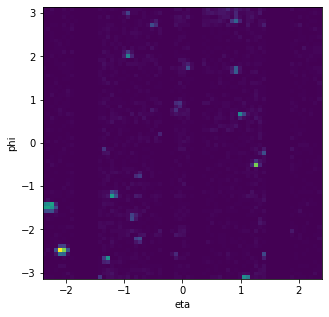

In [111]:
plt.figure(figsize=(5,5))
plt.xlabel("eta")
plt.ylabel("phi")
weights = np.array([1.0/len(true_indices)]*len(phis))
plt.hist2d(etas,phis,weights=weights,bins=70)

In [106]:
nPassTauReco = len([x for x in tauRecos if math.fabs(x)<0.15])
nPassMuonReco = len([x for x in muonRecos if math.fabs(x)<0.15])
print(nPassTauReco,nPassTauReco*1.0/len(false_indices))
print(nPassMuonReco,nPassMuonReco*1.0/len(false_indices))

663 0.11142857142857143
202 0.03394957983193277


(array([120., 144., 154., 151., 107.,  87., 182., 162., 119.,  41.,  34.,
         20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.,  81.,
        146., 130., 118., 145.,  69.,  64.,  37.,  61., 127., 111.,  87.,
        105., 123.,  65.,  57.,  43.,  54.,  68.,  60.,  49.,  45.,   0.,
          0.,   0.,  15.,  90.,  89., 104.,  89.,  68.,  76.,   7.,   0.,
          0.,   0.,  30.,  36.,  49.,  47.,  39.,  40.,  59.,  47.,  51.,
         66.,  53., 118., 142., 105., 106.,  98., 124.,  55., 111., 167.,
        121.,  83., 129.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         27.,  33.,  28.,  29.,  24.,  30.,  18.,  23.,  16.,  27.,  26.,
         27.]),
 array([-2.39903978e+00, -2.35105907e+00, -2.30307836e+00, -2.25509765e+00,
        -2.20711694e+00, -2.15913623e+00, -2.11115552e+00, -2.06317481e+00,
        -2.01519410e+00, -1.96721339e+00, -1.91923267e+00, -1.87125196e+00,
        -1.82327125e+00, -1.77529054e+00, -1.72730983e+00, -1.67932912e+00,
        -1.631

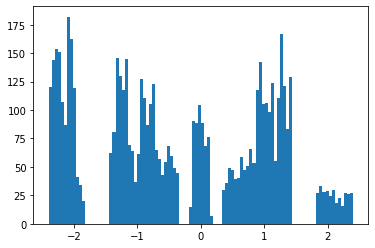

In [89]:
plt.hist(etas,bins=100)

(array([148.,  90.,  43.,  38.,  25.,  33.,  31.,  96.,  74., 152., 251.,
        127.,  22.,  27.,  76.,  45.,  47.,  57.,  32.,  40.,  30.,  26.,
         60.,  63.,  36., 197., 185., 182., 107.,  31., 107., 146.,  39.,
         19.,  36.,  31.,  24.,  38.,  53.,  34.,  25.,  57., 134.,  40.,
         24.,  34.,  54.,  62.,  28.,  27.,  29.,  42.,  33.,  36.,  34.,
         38.,  31.,  30.,  50.,  64., 140.,  77.,  54.,  30.,  83.,  48.,
         28.,  28.,  17.,  26.,  18.,  28.,  25.,  28.,  19.,  40.,  74.,
        100.,  86.,  56.,  44.,  46., 107.,  54.,  29.,  34.,  28.,  23.,
         24.,  34.,  31.,  29.,  42.,  94., 111.,  90.,  61., 105.,  95.,
         94.]),
 array([-3.14154703e+00, -3.07871585e+00, -3.01588467e+00, -2.95305349e+00,
        -2.89022231e+00, -2.82739112e+00, -2.76455994e+00, -2.70172876e+00,
        -2.63889758e+00, -2.57606640e+00, -2.51323522e+00, -2.45040404e+00,
        -2.38757286e+00, -2.32474168e+00, -2.26191050e+00, -2.19907932e+00,
        -2.136

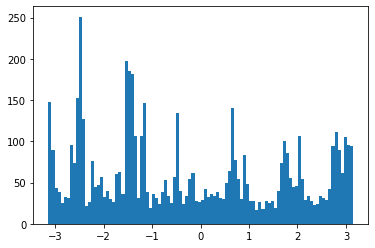

In [90]:
plt.hist(phis,bins=100)

In [43]:
print(imgs.shape)

(60, 40, 40)


array([ 0.00000000e+00,  1.37100000e+03,  1.00000000e+00,  2.90000000e+01,
        9.84930456e-01,  9.99552416e-01,  2.02837159e-02, -1.41497438e+00,
       -6.41077357e-01,  1.10000000e+01,  2.70350378e-04])

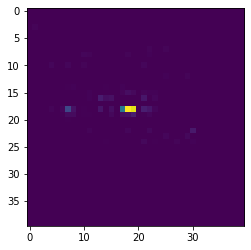